<a href="https://colab.research.google.com/github/Zypeks/DataLearning/blob/main/prawie_gotowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('accident.csv')
print(df.head())
df=df.dropna()


   Age  Gender  Speed_of_Impact Helmet_Used Seatbelt_Used  Survived
0   56  Female             27.0          No            No         1
1   69  Female             46.0          No           Yes         1
2   46    Male             46.0         Yes           Yes         0
3   32    Male            117.0          No           Yes         0
4   60  Female             40.0         Yes           Yes         0


Dane acident
klasyfikacja: survived yes/no


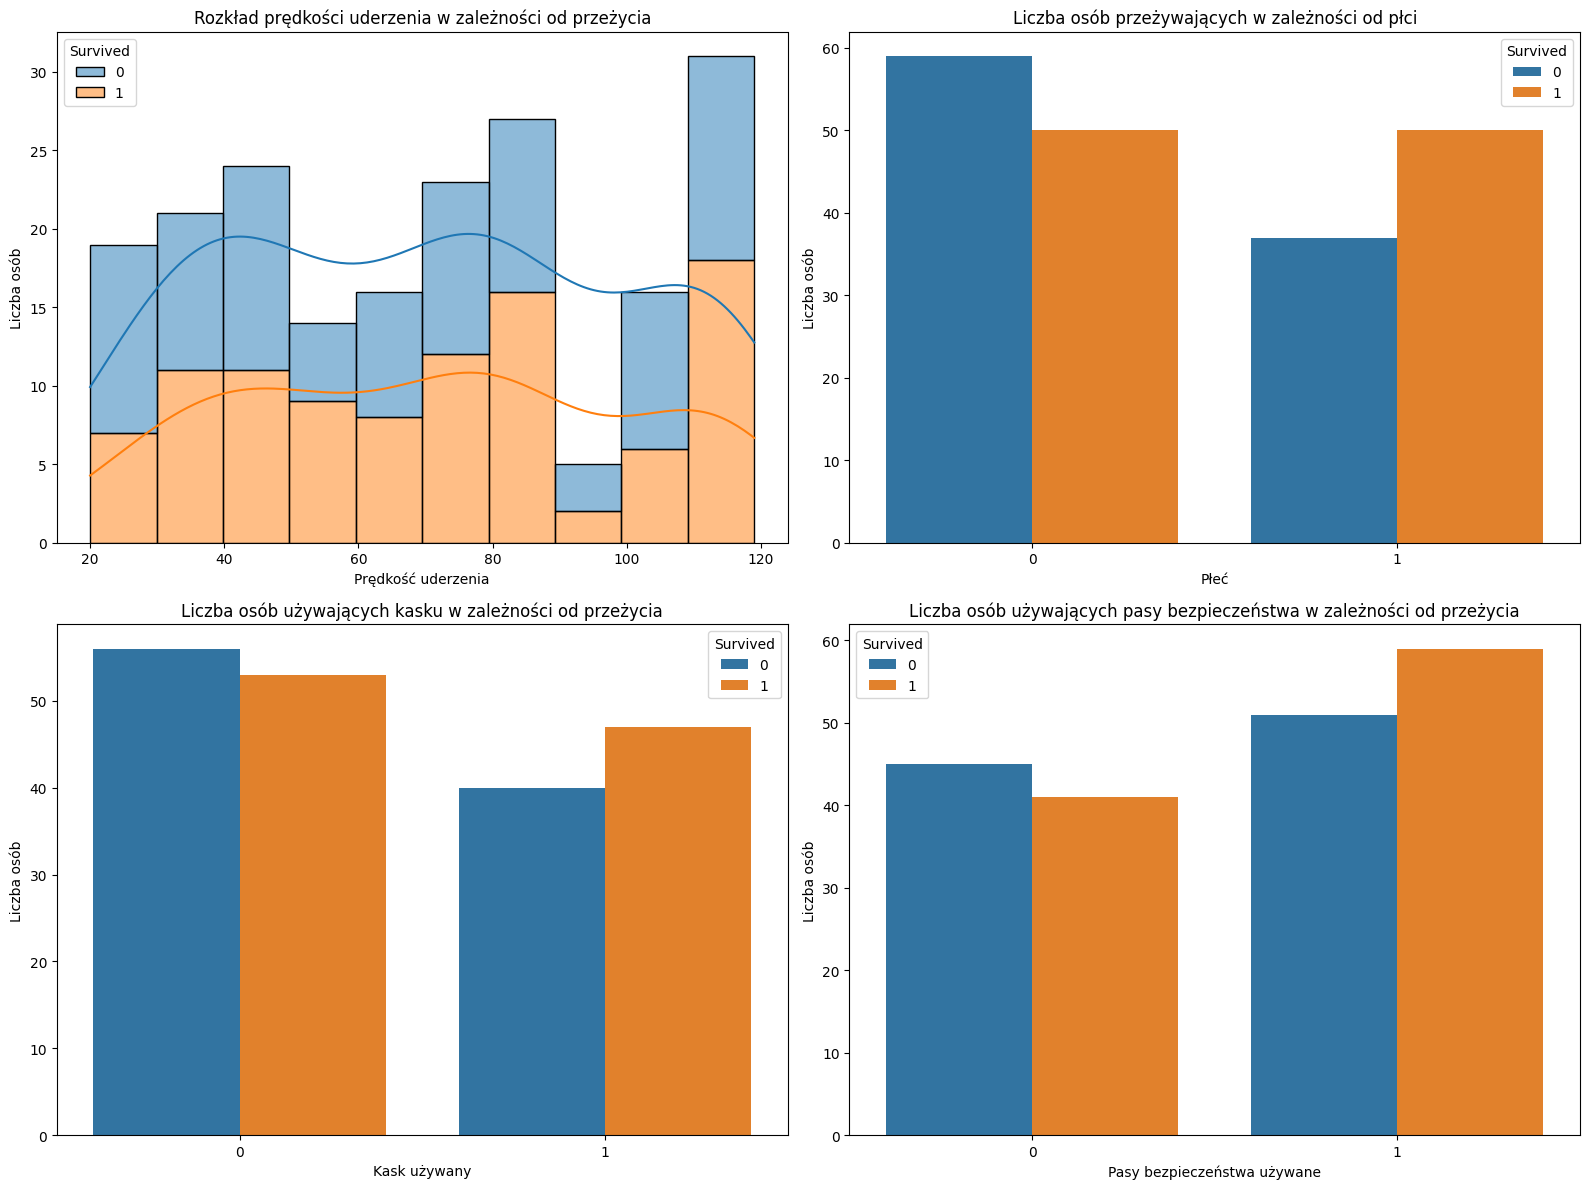

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tworzymy siatkę wykresów 2x2
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Wykres 1: Rozkład prędkości uderzenia w zależności od przeżycia
sns.histplot(data=df, x='Speed_of_Impact', hue='Survived', kde=True, multiple='stack', bins=10, ax=axes[0, 0])
axes[0, 0].set_title('Rozkład prędkości uderzenia w zależności od przeżycia')
axes[0, 0].set_xlabel('Prędkość uderzenia')
axes[0, 0].set_ylabel('Liczba osób')

# Wykres 2: Liczba osób przeżywających w zależności od płci
sns.countplot(x='Gender', hue='Survived', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Liczba osób przeżywających w zależności od płci')
axes[0, 1].set_xlabel('Płeć')
axes[0, 1].set_ylabel('Liczba osób')

# Wykres 3: Liczba osób używających kasku w zależności od przeżycia
sns.countplot(x='Helmet_Used', hue='Survived', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Liczba osób używających kasku w zależności od przeżycia')
axes[1, 0].set_xlabel('Kask używany')
axes[1, 0].set_ylabel('Liczba osób')

# Wykres 4: Liczba osób używających pasy bezpieczeństwa w zależności od przeżycia
sns.countplot(x='Seatbelt_Used', hue='Survived', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Liczba osób używających pasy bezpieczeństwa w zależności od przeżycia')
axes[1, 1].set_xlabel('Pasy bezpieczeństwa używane')
axes[1, 1].set_ylabel('Liczba osób')

# Wyświetlamy wykresy
plt.tight_layout()  # Ustawienie odpowiedniego rozmieszczenia wykresów
plt.show()


In [ ]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df['Helmet_Used'] = df['Helmet_Used'].map({'Yes': 0, 'No': 1})
df['Seatbelt_Used'] = df['Seatbelt_Used'].map({'Yes': 1, 'No': 0})
print(df.head())

   Age  Gender  Speed_of_Impact  Helmet_Used  Seatbelt_Used  Survived
0   56       0             27.0            1              0         1
1   69       0             46.0            1              1         1
2   46       1             46.0            0              1         0
3   32       1            117.0            1              1         0
4   60       0             40.0            0              1         0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Kopia oryginalnego DataFrame (żeby nie modyfikować df bezpośrednio)
df_scaled = df.copy()

# Skalowanie tylko dwóch kolumn
scaler = MinMaxScaler()
df_scaled[['Age', 'Speed_of_Impact']] = scaler.fit_transform(df_scaled[['Age', 'Speed_of_Impact']])
print(df_scaled.head())

        Age  Gender  Speed_of_Impact  Helmet_Used  Seatbelt_Used  Survived
0  0.745098       0         0.070707            1              0         1
1  1.000000       0         0.262626            1              1         1
2  0.549020       1         0.262626            0              1         0
3  0.274510       1         0.979798            1              1         0
4  0.823529       0         0.202020            0              1         0


In [ ]:
correlation_with_survived = df_scaled.corr()['Survived'].sort_values(ascending=False)
print(correlation_with_survived)

Survived           1.000000
Age                0.119213
Gender             0.115288
Seatbelt_Used      0.059183
Helmet_Used        0.053661
Speed_of_Impact    0.042902
Name: Survived, dtype: float64


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics import accuracy_score, classification_report


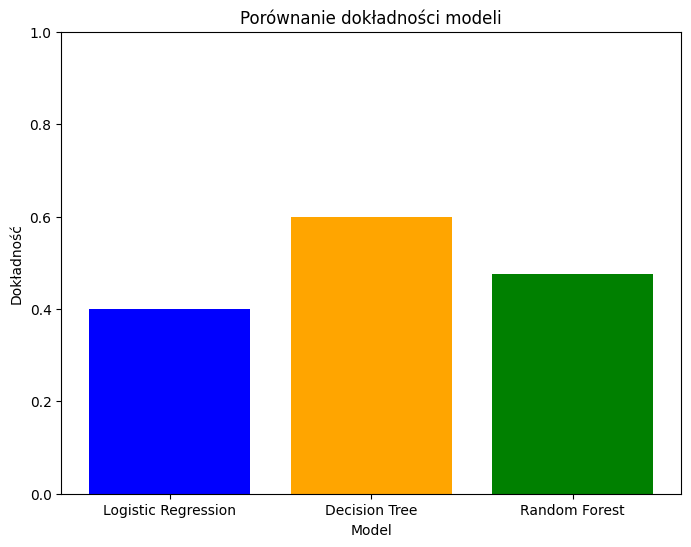

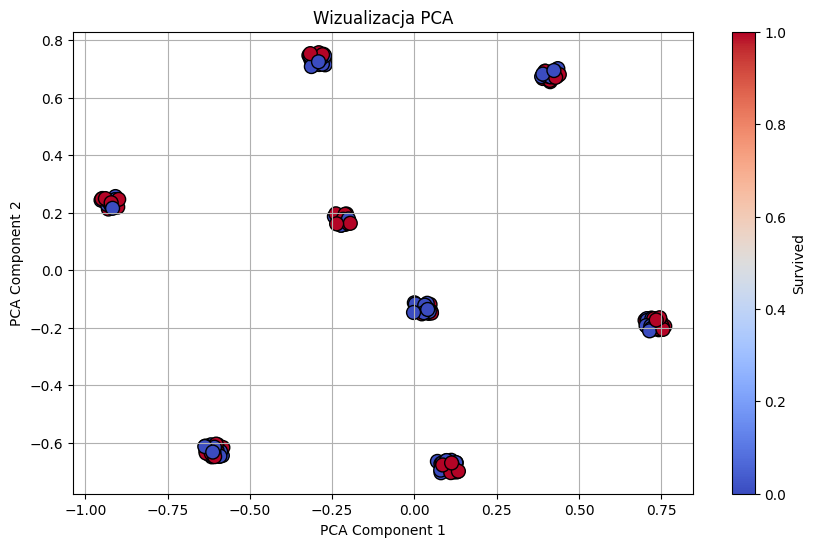

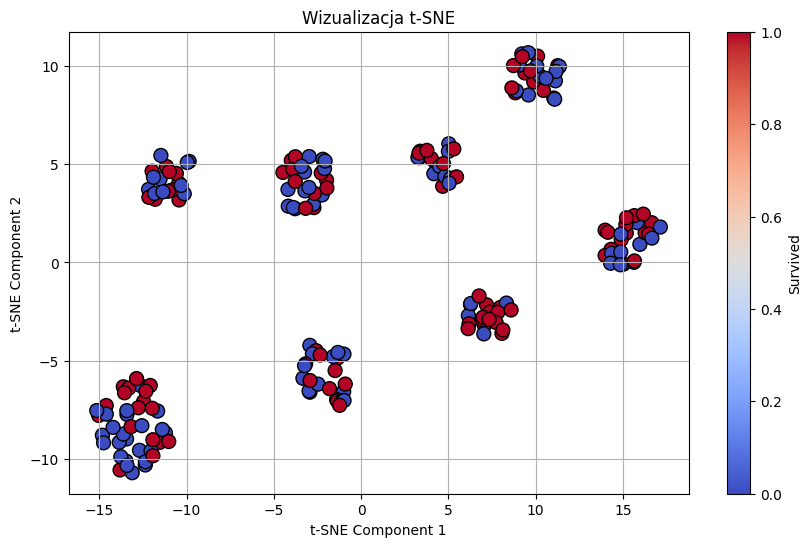

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
# Przygotowanie zmiennych X i y z przeskalowanego DataFrame
X = df_scaled[['Age', 'Speed_of_Impact', 'Seatbelt_Used', 'Gender', 'Helmet_Used']]
y = df_scaled['Survived']

# Ponowne skalowanie wszystkich cech do modelowania (jeśli chcesz też przeskalować binarne — OK)
X_scaled = scaler.fit_transform(X)

# Podział danych na zbiór treningowy i testowy (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# PCA dla redukcji wymiarów
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# t-SNE dla redukcji wymiarów
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Tworzenie modelu regresji logistycznej
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

# Tworzenie modelu drzewa decyzyjnego
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)

# Tworzenie modelu random forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Wykres porównujący dokładność modeli
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_logreg, accuracy_dtree, accuracy_rf]

# Tworzenie wykresu słupkowego
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green'])

# Dodanie tytułu i etykiet
plt.title('Porównanie dokładności modeli')
plt.xlabel('Model')
plt.ylabel('Dokładność')
plt.ylim([0, 1])  # Ustawienie zakresu na osi Y od 0 do 1
plt.show()

# Wizualizacja wyników PCA z kolorami tylko 0 i 1
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=100)
plt.title('Wizualizacja PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.colorbar(label='Survived')  # Kolor odpowiada 'Survived' (0 - nie przeżył, 1 - przeżył)
plt.show()

# Wizualizacja wyników t-SNE z kolorami tylko 0 i 1
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=100)
plt.title('Wizualizacja t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.colorbar(label='Survived')  # Kolor odpowiada 'Survived' (0 - nie przeżył, 1 - przeżył)
plt.show()


Dokładność modelu Random Forest: 0.47


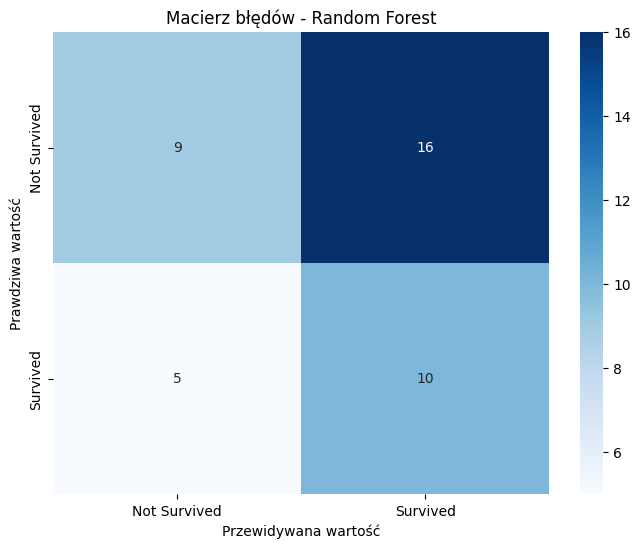

In [ ]:
# Obliczamy dokładność modelu
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Dokładność modelu Random Forest: {accuracy_rf:.2f}')

# Obliczenie macierzy błędów
cm = confusion_matrix(y_test, y_pred_rf)

# Rysowanie wykresu macierzy błędów
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Macierz błędów - Random Forest')
plt.xlabel('Przewidywana wartość')
plt.ylabel('Prawdziwa wartość')
plt.show()

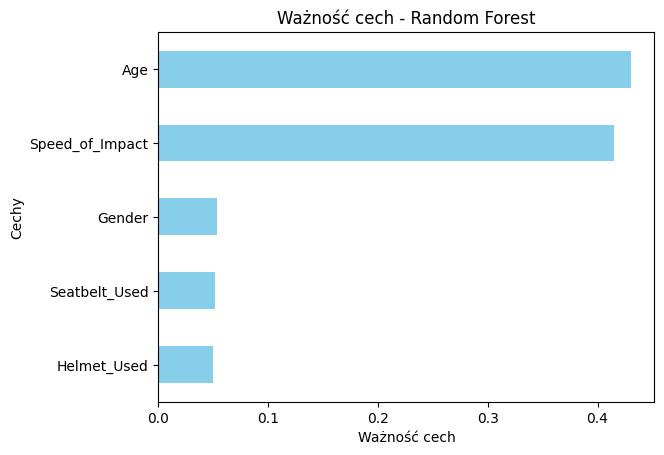

In [ ]:
# Obliczanie ważności cech dla modelu Random Forest
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

# Sortowanie ważności cech
feature_importances = feature_importances.sort_values()

# Rysowanie wykresu słupkowego poziomego
feature_importances.plot(kind='barh', title='Ważność cech - Random Forest', color='skyblue')

# Wyświetlenie wykresu
plt.xlabel('Ważność cech')
plt.ylabel('Cechy')
plt.show()


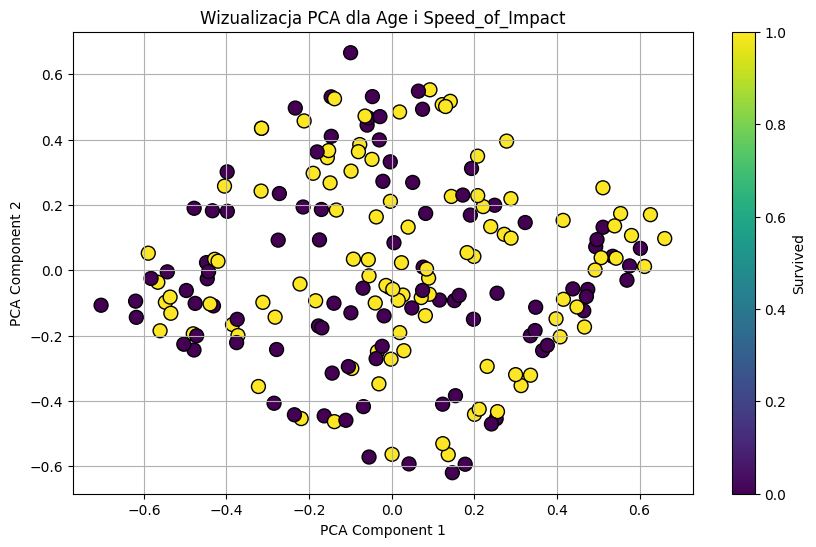

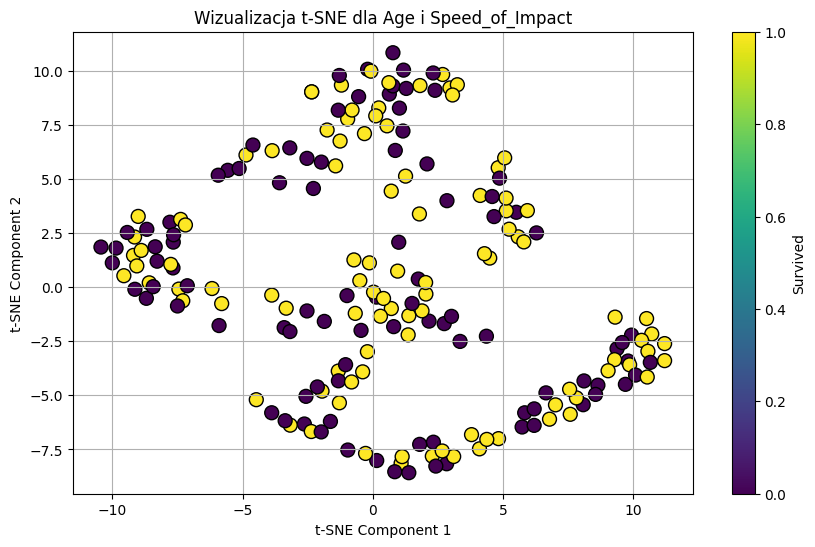

In [ ]:
# Przygotowanie zmiennych X i y tylko z `Age` i `Speed_of_Impact`
X_2 = df_scaled[['Age', 'Speed_of_Impact']]
y_2 = df_scaled['Survived']

# Podział danych na zbiór treningowy i testowy (80% / 20%)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
# PCA dla redukcji wymiarów
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_2)

# t-SNE dla redukcji wymiarów
tsne_2 = TSNE(n_components=2, random_state=42)
X_tsne_2 = tsne_2.fit_transform(X_2)

# Wizualizacja wyników PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=y_2, cmap='viridis', edgecolor='k', s=100)
plt.title('Wizualizacja PCA dla Age i Speed_of_Impact')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.colorbar(label='Survived')
plt.show()

# Wizualizacja wyników t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne_2[:, 0], X_tsne_2[:, 1], c=y_2, cmap='viridis', edgecolor='k', s=100)
plt.title('Wizualizacja t-SNE dla Age i Speed_of_Impact')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.colorbar(label='Survived')
plt.show()


In [ ]:
logreg_2 = LogisticRegression()
logreg_2.fit(X_train_2, y_train_2)
y_pred_logreg_2 = logreg_2.predict(X_test_2)
accuracy_logreg_2 = accuracy_score(y_test_2, y_pred_logreg_2)
print("Logistic Regression (Age + Speed_of_Impact):")
print(f"Accuracy: {accuracy_logreg_2:.2f}")
print(classification_report(y_test_2, y_pred_logreg_2))


Logistic Regression (Age + Speed_of_Impact):
Accuracy: 0.53
              precision    recall  f1-score   support

           0       1.00      0.24      0.39        25
           1       0.44      1.00      0.61        15

    accuracy                           0.53        40
   macro avg       0.72      0.62      0.50        40
weighted avg       0.79      0.53      0.47        40



In [ ]:
dtree_2 = DecisionTreeClassifier(random_state=42)
dtree_2.fit(X_train_2, y_train_2)
y_pred_dtree_2 = dtree_2.predict(X_test_2)
accuracy_dtree_2 = accuracy_score(y_test_2, y_pred_dtree_2)
print("Decision Tree (Age + Speed_of_Impact):")
print(f"Accuracy: {accuracy_dtree_2:.2f}")
print(classification_report(y_test_2, y_pred_dtree_2))


Decision Tree (Age + Speed_of_Impact):
Accuracy: 0.38
              precision    recall  f1-score   support

           0       0.50      0.32      0.39        25
           1       0.29      0.47      0.36        15

    accuracy                           0.38        40
   macro avg       0.40      0.39      0.37        40
weighted avg       0.42      0.38      0.38        40



In [ ]:
rf_2 = RandomForestClassifier(random_state=42)
rf_2.fit(X_train_2, y_train_2)
y_pred_rf_2 = rf_2.predict(X_test_2)
accuracy_rf_2 = accuracy_score(y_test_2, y_pred_rf_2)
print("Random Forest (Age + Speed_of_Impact):")
print(f"Accuracy: {accuracy_rf_2:.2f}")
print(classification_report(y_test_2, y_pred_rf_2))


Random Forest (Age + Speed_of_Impact):
Accuracy: 0.38
              precision    recall  f1-score   support

           0       0.50      0.24      0.32        25
           1       0.32      0.60      0.42        15

    accuracy                           0.38        40
   macro avg       0.41      0.42      0.37        40
weighted avg       0.43      0.38      0.36        40



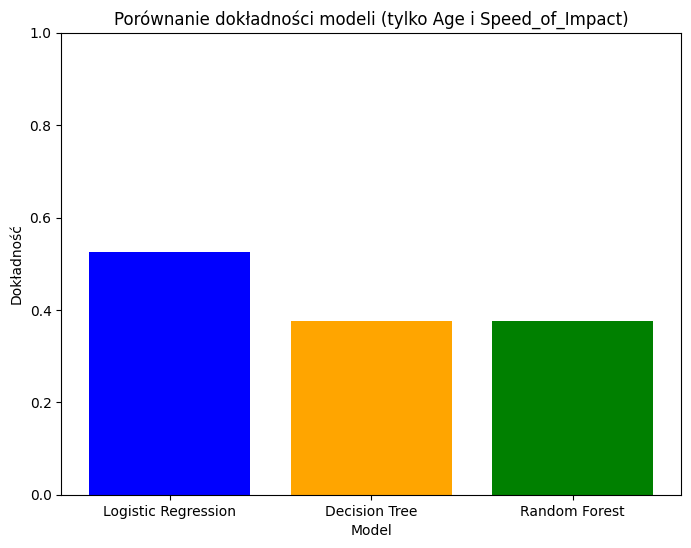

In [ ]:
models_2 = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies_2 = [accuracy_logreg_2, accuracy_dtree_2, accuracy_rf_2]

# Tworzenie wykresu słupkowego
plt.figure(figsize=(8, 6))
plt.bar(models_2, accuracies_2, color=['blue', 'orange', 'green'])

# Dodanie tytułu i etykiet
plt.title('Porównanie dokładności modeli (tylko Age i Speed_of_Impact)')
plt.xlabel('Model')
plt.ylabel('Dokładność')
plt.ylim([0, 1])  # Ustawienie zakresu na osi Y od 0 do 1
plt.show()


In [ ]:
# Tworzenie modelu KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Tworzenie modelu SVM
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)


In [ ]:
print('K-Nearest Neighbors:')
print(classification_report(y_test, y_pred_knn))
print('Support Vector Machine:')
print(classification_report(y_test, y_pred_svm))


K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.69      0.36      0.47        25
           1       0.41      0.73      0.52        15

    accuracy                           0.50        40
   macro avg       0.55      0.55      0.50        40
weighted avg       0.59      0.50      0.49        40

Support Vector Machine:
              precision    recall  f1-score   support

           0       0.43      0.12      0.19        25
           1       0.33      0.73      0.46        15

    accuracy                           0.35        40
   macro avg       0.38      0.43      0.32        40
weighted avg       0.39      0.35      0.29        40



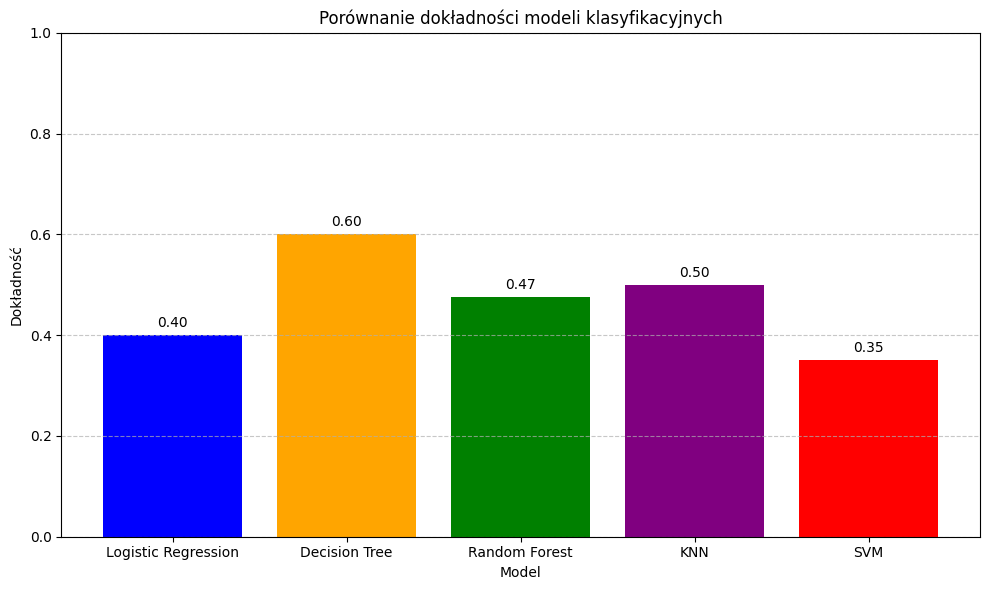

In [ ]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM']
accuracies = [accuracy_logreg, accuracy_dtree, accuracy_rf, accuracy_knn, accuracy_svm]
# Tworzenie wykresu słupkowego
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'purple', 'red'])

# Dodanie wartości dokładności nad słupkami
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=10)

# Dodanie tytułu i etykiet
plt.title('Porównanie dokładności modeli klasyfikacyjnych')
plt.xlabel('Model')
plt.ylabel('Dokładność')
plt.ylim([0, 1])  # Zakres osi Y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Wyświetlenie wykresu
plt.tight_layout()
plt.show()

Po walkach z danymi i braku korelacji, poddaję ten zbiór danych i używam uprzednio przygotowanego do innego przedmiotu.


In [ ]:
dane_surowe = pd.read_excel("credit_koniec_v2.xlsx", sheet_name="oryginał", engine="openpyxl")
dane_surowe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  default               1000 non-null   object
dtypes: int64(6), object(9)
memory usage: 11

<ipython-input-4-1e86f1a6cc1e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dane_surowe, x=zmienna, palette='Set2')
<ipython-input-4-1e86f1a6cc1e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dane_surowe, x=zmienna, palette='Set2')
<ipython-input-4-1e86f1a6cc1e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dane_surowe, x=zmienna, palette='Set2')
<ipython-input-4-1e86f1a6cc1e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to 

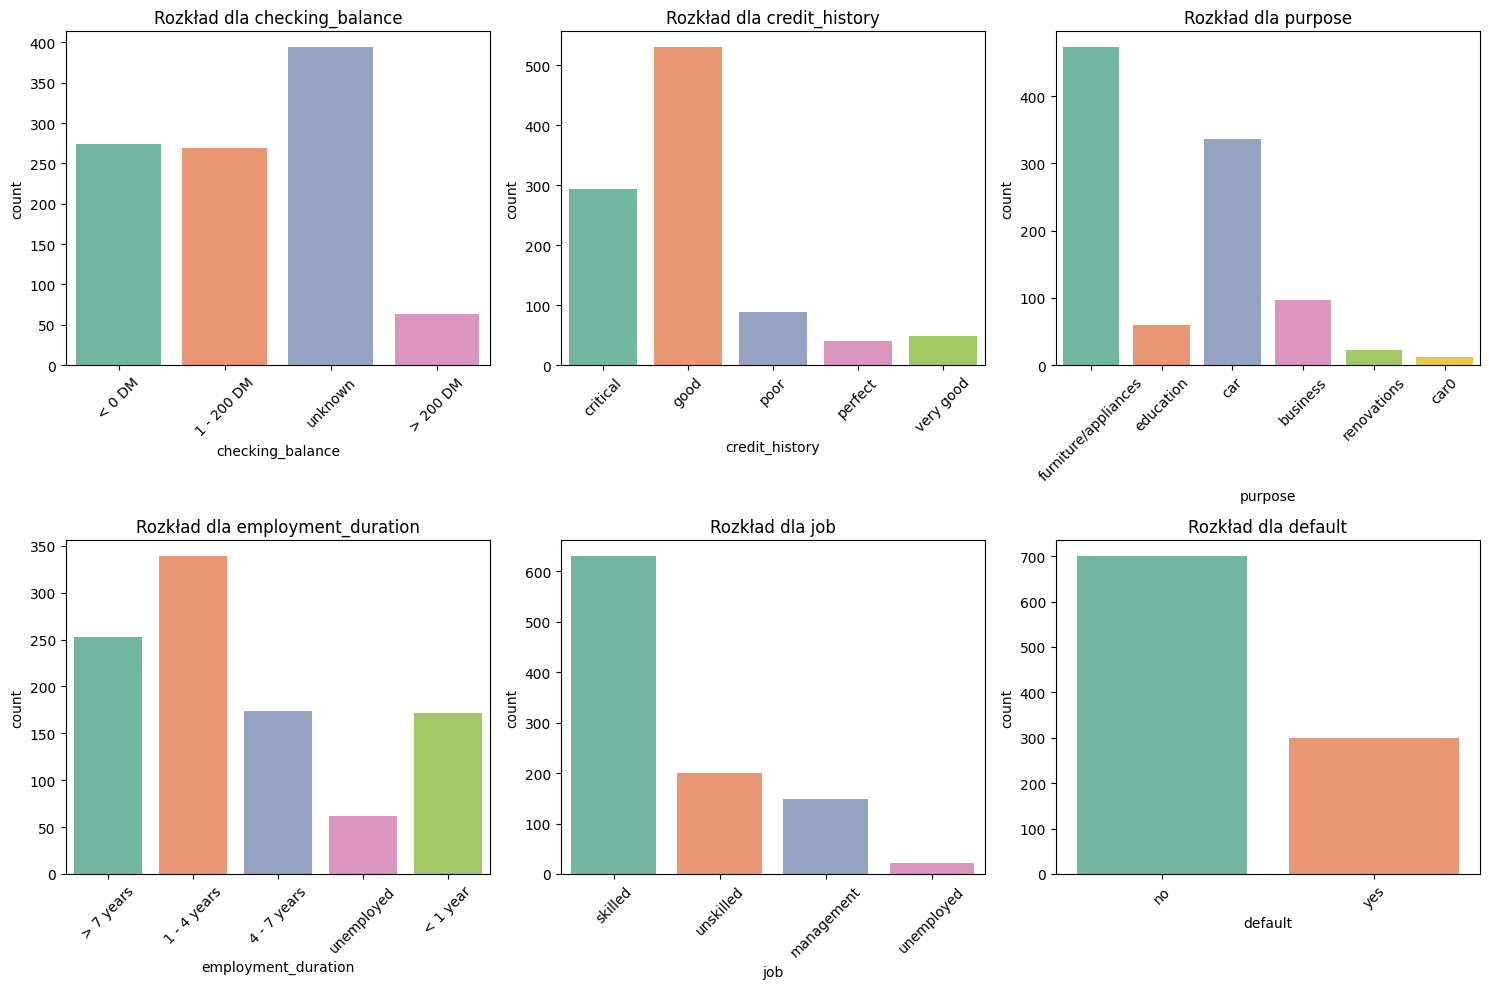

In [ ]:
# Lista zmiennych kategorycznych
kategoryczne_zmienne = ['checking_balance', 'credit_history', 'purpose', 'employment_duration', 'job', 'default']

# Tworzymy wykresy słupkowe dla zmiennych kategorycznych
plt.figure(figsize=(15, 10))
for i, zmienna in enumerate(kategoryczne_zmienne, 1):
    plt.subplot(2, 3, i)  # tworzymy siatkę wykresów 2x3
    sns.countplot(data=dane_surowe, x=zmienna, palette='Set2')
    plt.title(f'Rozkład dla {zmienna}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

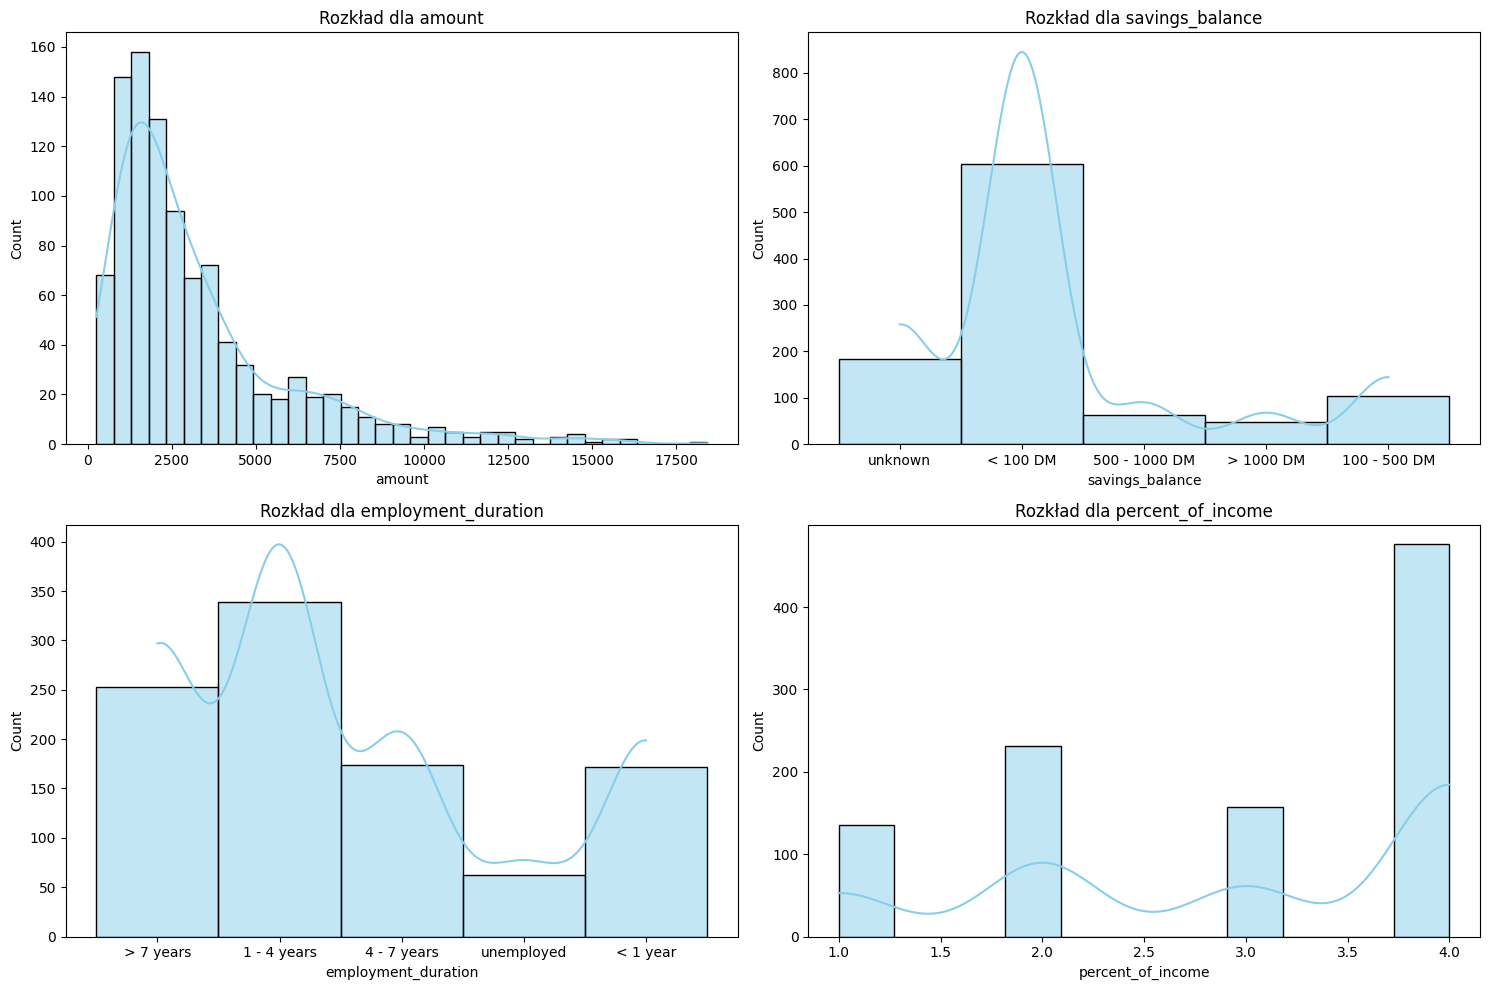

In [ ]:
# Lista zmiennych numerycznych
numeryczne_zmienne = ['amount', 'savings_balance', 'employment_duration', 'percent_of_income']

# Tworzymy histogramy dla zmiennych numerycznych
plt.figure(figsize=(15, 10))
for i, zmienna in enumerate(numeryczne_zmienne, 1):
    plt.subplot(2, 2, i)  # tworzymy siatkę wykresów 2x2
    sns.histplot(data=dane_surowe, x=zmienna, kde=True, color='skyblue')
    plt.title(f'Rozkład dla {zmienna}')

plt.tight_layout()
plt.show()


In [ ]:
# Wykresy rozrzutu dla zmiennych numerycznych
# aby wykonac wykresy zależności potrzebuję użyć arkusza, w którym dane są już przerobione na liczbowe
dane_liczbowe =  pd.read_excel("credit_koniec_v2.xlsx", sheet_name="liczbowe", engine="openpyxl")
print(dane_liczbowe.head())


   months_loan_duration  credit_history  amount  percent_of_income  \
0                     6               1    1169                  4   
1                    48               2    5951                  2   
2                    12               1    2096                  2   
3                    42               2    7882                  2   
4                    24               0    4870                  3   

   years_at_residence  age  existing_loans_count  job  default  \
0                   4   67                     2    2        0   
1                   2   22                     1    2        1   
2                   3   49                     1    2        0   
3                   4   45                     1    2        0   
4                   4   53                     2    1        1   

   checking_balance  savings_balance  employment_duration  
0                 0                0                    8  
1                82               39                    1  
2 

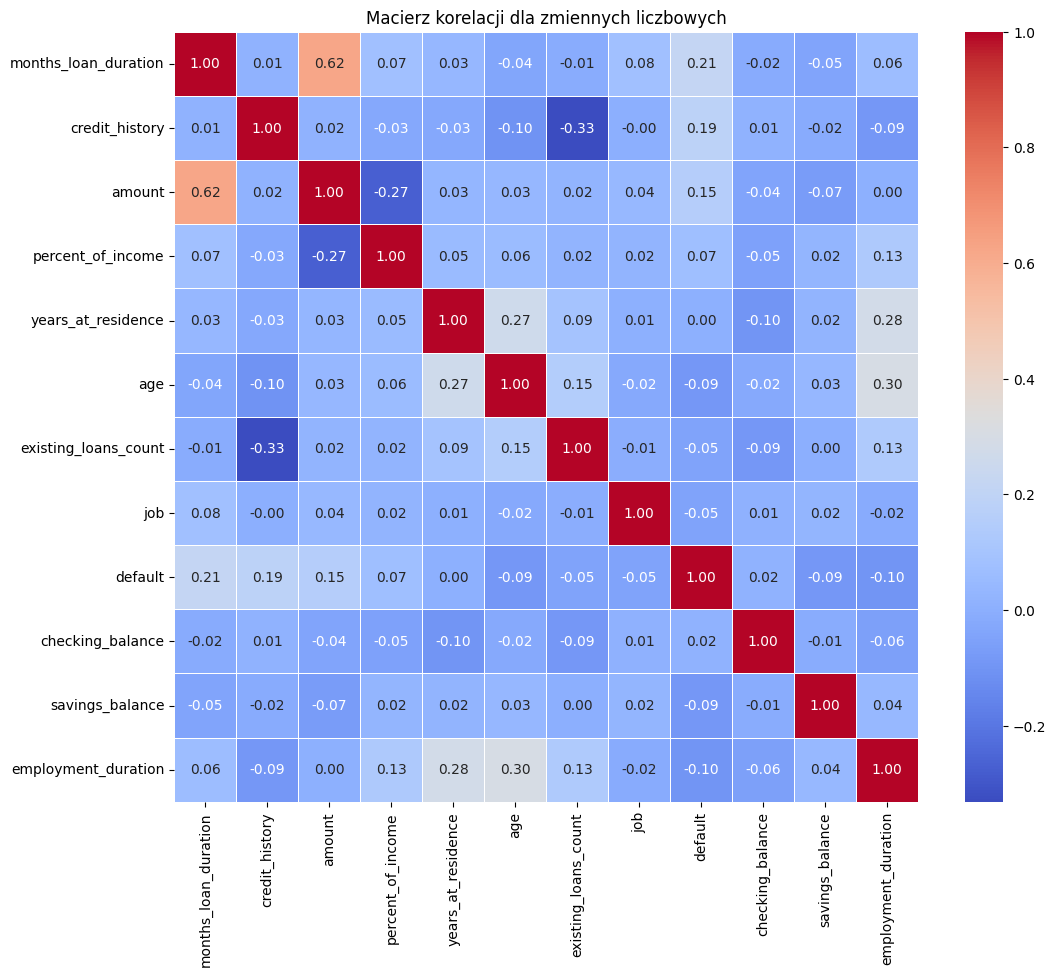

In [ ]:
# Obliczamy korelację między wszystkimi zmiennymi liczbowymi
corr_matrix = dane_liczbowe.corr()

# Tworzymy wykres ciepłej mapy dla macierzy korelacji
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Macierz korelacji dla zmiennych liczbowych')
plt.show()


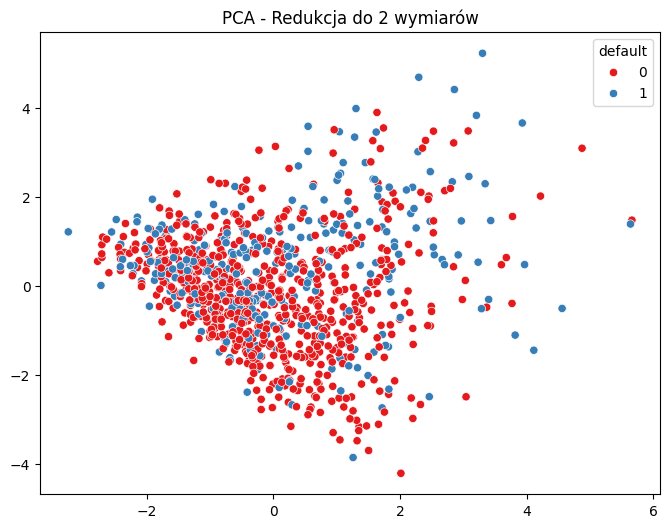

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


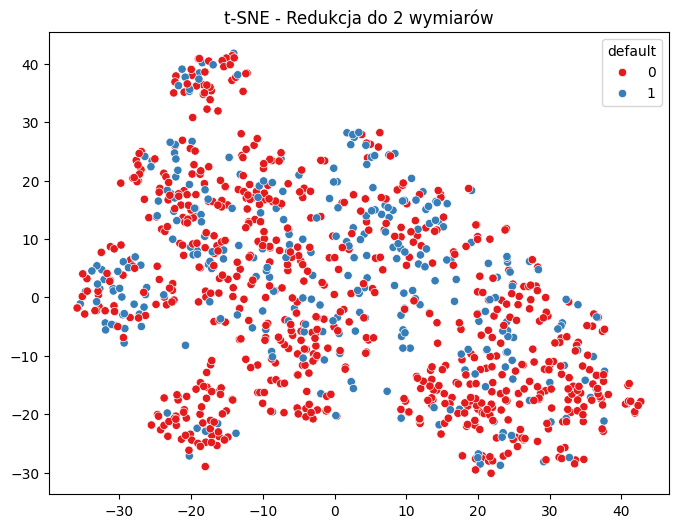

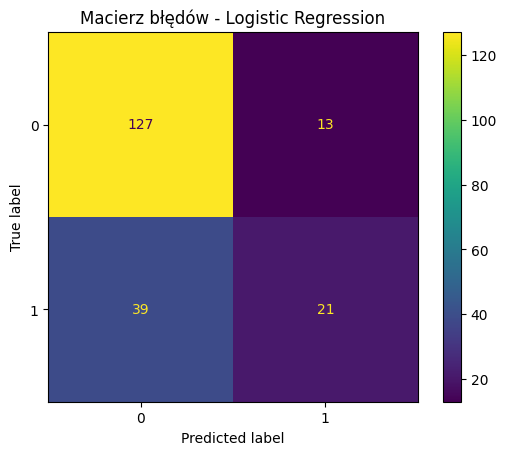

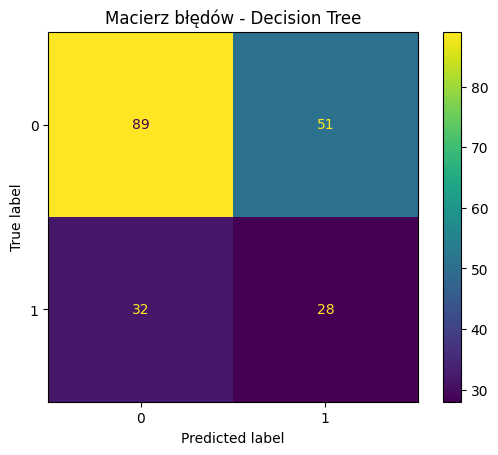

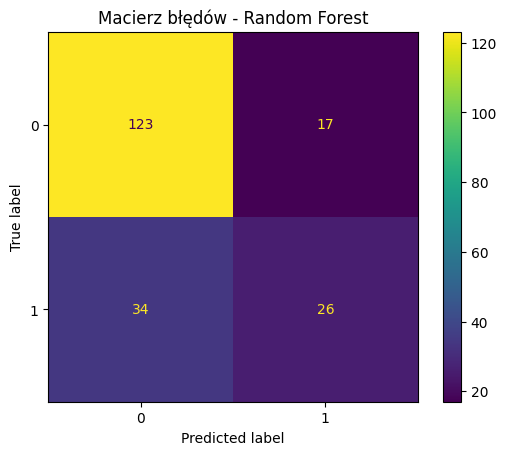

<ipython-input-62-eb6e4926d329>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=accuracy_results, x="Model", y="Accuracy", palette="viridis")


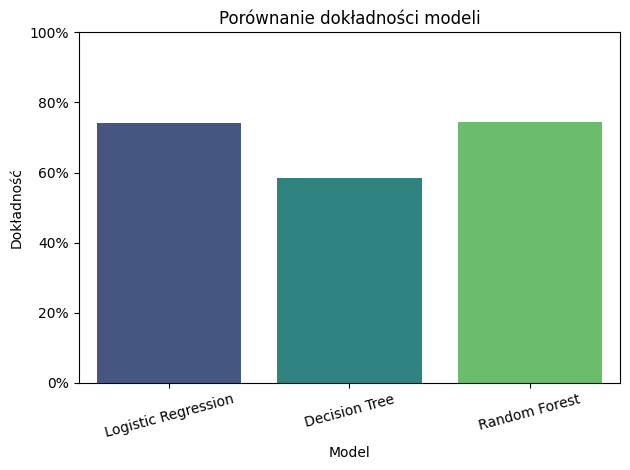

In [62]:
#importy
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# --- Wczytanie danych ---
dane = pd.read_excel("credit_koniec_v2.xlsx", sheet_name="liczbowe norm", engine="openpyxl")

# --- Podział danych ---
X = dane.drop('default', axis=1)
y = dane['default'].astype(int)  # jeśli jeszcze nie int, to tylko to

# --- Podział na zbiór treningowy i testowy ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Skalowanie ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ... reszta analizy i modeli


# --- PCA (na całym zbiorze) ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaler.transform(X))  # skalujemy całe X
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1')
plt.title("PCA - Redukcja do 2 wymiarów")
plt.show()

# --- t-SNE (na całym zbiorze) ---
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(scaler.transform(X))
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='Set1')
plt.title("t-SNE - Redukcja do 2 wymiarów")
plt.show()

# --- Modele ---
model_logreg = LogisticRegression(max_iter=1000, random_state=42)
model_logreg.fit(X_train_scaled, y_train)
pred_logreg_prob = model_logreg.predict_proba(X_test_scaled)[:, 1]
pred_class_logreg = (pred_logreg_prob > 0.5).astype(int)

model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train_scaled, y_train)
pred_tree_prob = model_tree.predict_proba(X_test_scaled)[:, 1]
pred_class_tree = (pred_tree_prob > 0.5).astype(int)

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)
pred_rf_prob = model_rf.predict_proba(X_test_scaled)[:, 1]
pred_class_rf = (pred_rf_prob > 0.5).astype(int)

# --- Macierze błędów ---
models = {
    "Logistic Regression": pred_class_logreg,
    "Decision Tree": pred_class_tree,
    "Random Forest": pred_class_rf,
}
for name, pred in models.items():
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot()
    plt.title(f"Macierz błędów - {name}")
    plt.show()

# --- Dokładności ---
accuracy_results = pd.DataFrame({
    "Model": list(models.keys()),
    "Accuracy": [accuracy_score(y_test, pred) for pred in models.values()]
})

sns.barplot(data=accuracy_results, x="Model", y="Accuracy", palette="viridis")
plt.title("Porównanie dokładności modeli")
plt.ylabel("Dokładność")
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [ ]:
!pip install imbalanced-learn


<ipython-input-63-fb903e296429>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_sorted.index, y=corr_sorted.values, palette='coolwarm')


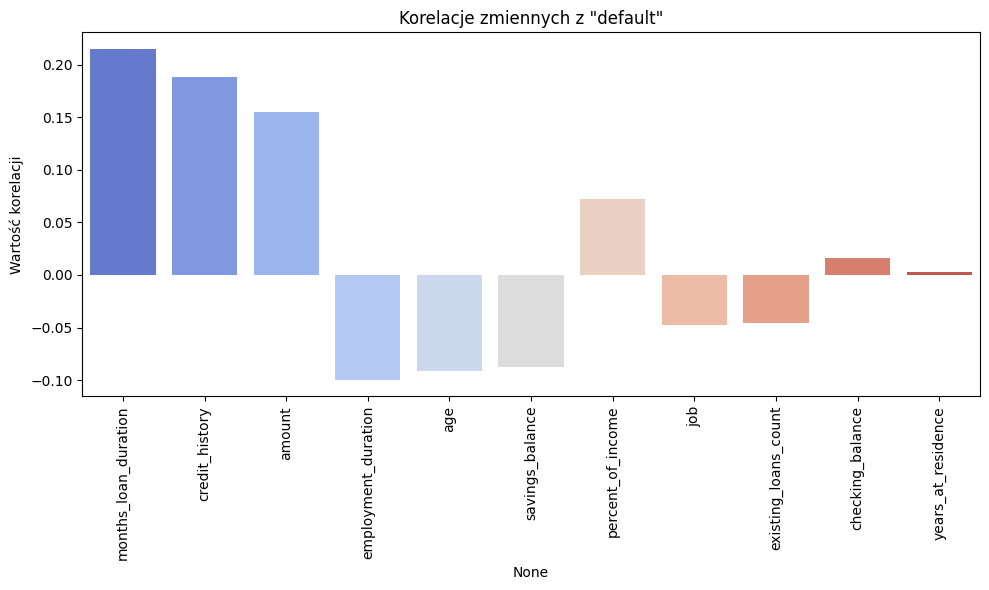

Najmocniej skorelowane zmienne z 'default':
months_loan_duration    0.215
credit_history          0.188
amount                  0.155
employment_duration    -0.100
age                    -0.091
savings_balance        -0.088
percent_of_income       0.072
job                    -0.047
existing_loans_count   -0.046
checking_balance        0.016
years_at_residence      0.003
Name: default, dtype: float64


In [63]:
# Zakładając, że zmienna 'default' istnieje i jest liczbowa (np. 0/1, a nie '0'/'1')
if 'default' in dane_liczbowe.columns:
    # Oblicz korelacje ze zmienną 'default'
    corr_default = dane_liczbowe.corr()['default'].drop('default')

    # Sortuj według wartości bezwzględnej
    corr_sorted = corr_default.reindex(corr_default.abs().sort_values(ascending=False).index)

    # Wyświetl wykres
    plt.figure(figsize=(10, 6))
    sns.barplot(x=corr_sorted.index, y=corr_sorted.values, palette='coolwarm')
    plt.title('Korelacje zmiennych z "default"')
    plt.ylabel('Wartość korelacji')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Wypisz korelacje liczbowo (np. do późniejszego użycia)
    print("Najmocniej skorelowane zmienne z 'default':")
    print(corr_sorted.round(3))


                 Feature  Random Forest Importance  Decision Tree Importance
2                 amount                  0.183704                  0.198162
9        savings_balance                  0.156623                  0.149541
5                    age                  0.132151                  0.141320
0   months_loan_duration                  0.118685                  0.117315
10   employment_duration                  0.094658                  0.089677
1         credit_history                  0.075743                  0.072313
8       checking_balance                  0.070947                  0.080300
4     years_at_residence                  0.050604                  0.052424
3      percent_of_income                  0.046555                  0.035549
7                    job                  0.045501                  0.037785
6   existing_loans_count                  0.024830                  0.025613


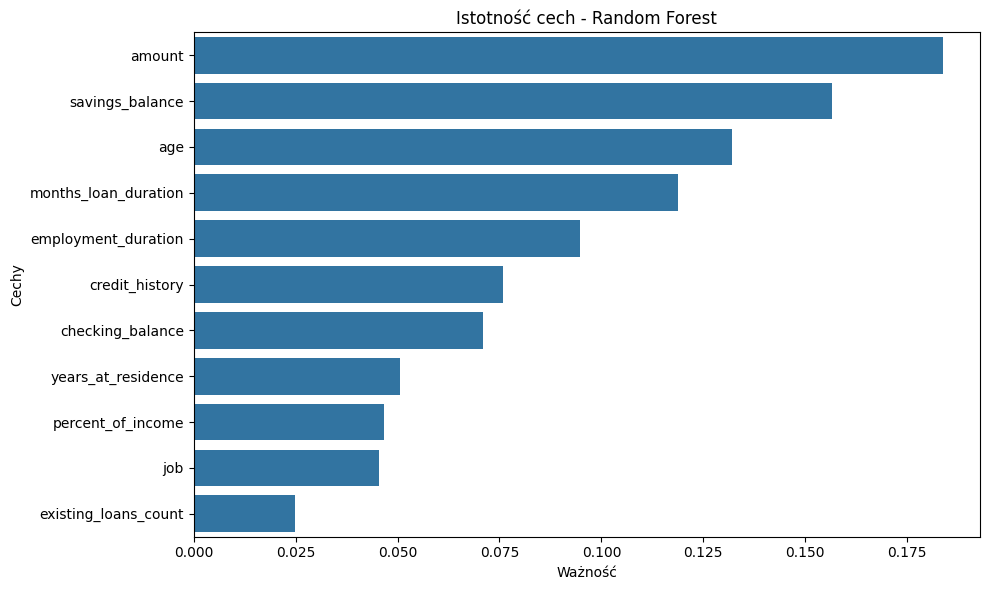

In [64]:
# Istotność cech dla Random Forest
rf_importance = model_rf.feature_importances_

# Istotność cech dla Drzewa Decyzyjnego
tree_importance = model_tree.feature_importances_

# Tworzenie dataframe z wynikami
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Random Forest Importance': rf_importance,
    'Decision Tree Importance': tree_importance
})

# Posortowanie cech po istotności (malejąco)
importance_df = importance_df.sort_values(by='Random Forest Importance', ascending=False)

# Wyświetlenie tabeli
print(importance_df)
# Wizualizacja istotności cech (Random Forest)
plt.figure(figsize=(10, 6))
sns.barplot(x='Random Forest Importance', y='Feature', data=importance_df)
plt.title('Istotność cech - Random Forest')
plt.xlabel('Ważność')
plt.ylabel('Cechy')
plt.tight_layout()
plt.show()



# Po wykresach i wynikach istotności cech wybieram te 6 kolumn do dalszej analizy aby poprawić model

amount

savings_balance

age

months_loan_duration

employment_duration

credit_history

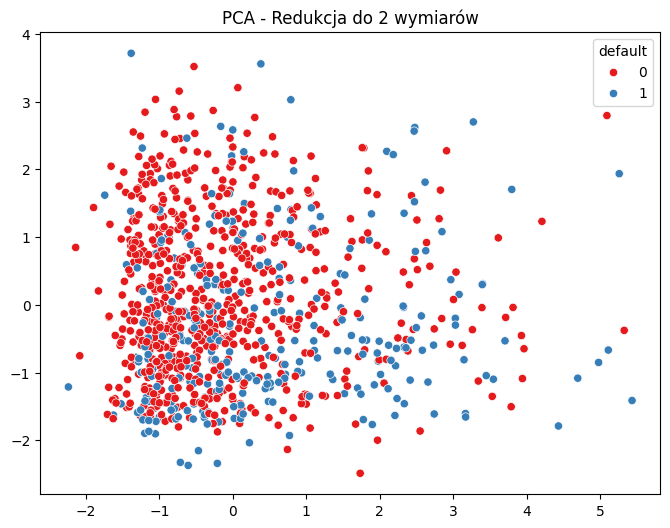

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


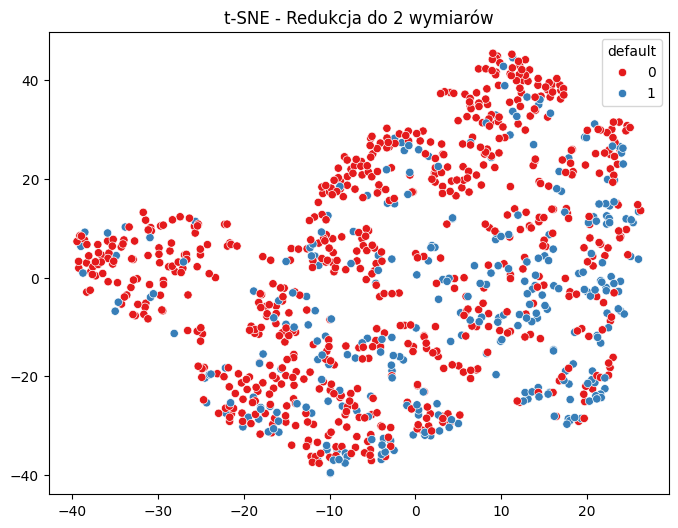

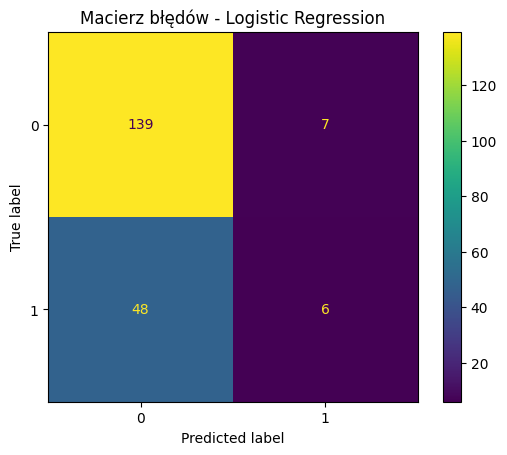

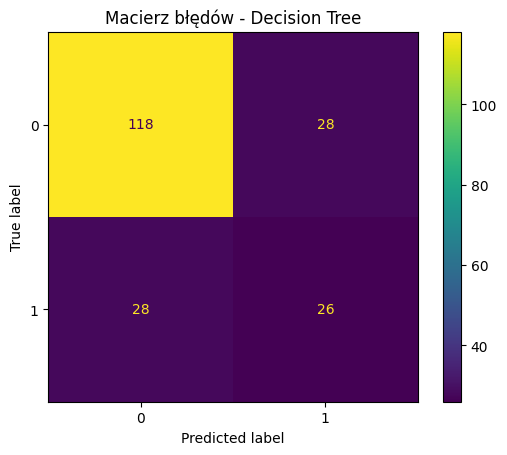

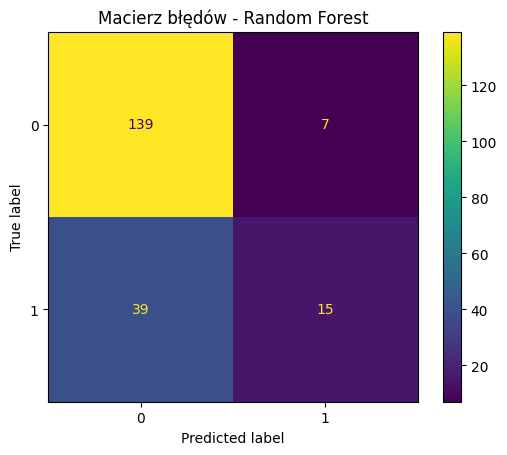

<ipython-input-66-ae0fd3e3091b>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=accuracy_results, x="Model", y="Accuracy", palette="viridis")


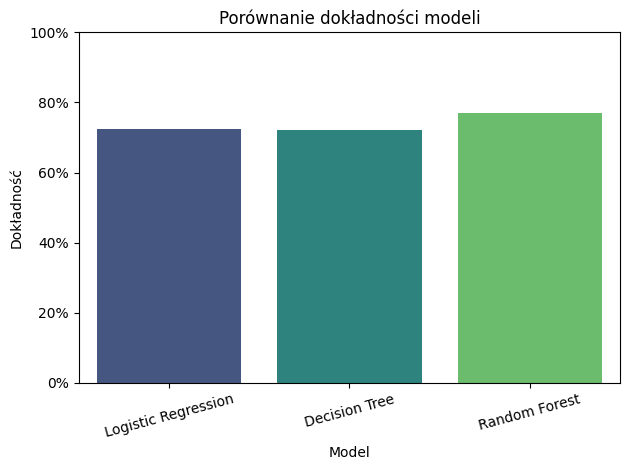

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# --- Wczytanie danych ---
dane = pd.read_excel("credit_koniec_v2.xlsx", sheet_name="liczbowe norm", engine="openpyxl")

# --- Przygotowanie danych ---
dane['default'] = dane['default'].astype(int)  # KONWERSJA DO INT
dane['credit_history'] = pd.to_numeric(dane['credit_history'], errors='coerce')
dane['checking_balance'] = pd.to_numeric(dane['checking_balance'], errors='coerce')

# --- Wybór 6 cech ---
features = ['amount', 'savings_balance', 'age', 'months_loan_duration', 'employment_duration', 'credit_history']
X = dane[features]
y = dane['default']

# --- Podział danych ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# --- Skalowanie ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- PCA ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaler.fit_transform(X))  # skalujemy całe X do wizualizacji PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1')
plt.title("PCA - Redukcja do 2 wymiarów")
plt.show()

# --- t-SNE ---
tsne = TSNE(n_components=2, random_state=21, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(scaler.fit_transform(X))  # skalujemy całe X do wizualizacji t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='Set1')
plt.title("t-SNE - Redukcja do 2 wymiarów")
plt.show()

# --- Modele ---
model_logreg = LogisticRegression(max_iter=1000, random_state=21)
model_logreg.fit(X_train_scaled, y_train)
pred_logreg_prob = model_logreg.predict_proba(X_test_scaled)[:, 1]
pred_class_logreg = np.where(pred_logreg_prob > 0.5, 1, 0)

model_tree = DecisionTreeClassifier(random_state=21)
model_tree.fit(X_train_scaled, y_train)
pred_tree_prob = model_tree.predict_proba(X_test_scaled)[:, 1]
pred_class_tree = np.where(pred_tree_prob > 0.5, 1, 0)

model_rf = RandomForestClassifier(n_estimators=100, random_state=21)
model_rf.fit(X_train_scaled, y_train)
pred_rf_prob = model_rf.predict_proba(X_test_scaled)[:, 1]
pred_class_rf = np.where(pred_rf_prob > 0.5, 1, 0)

# --- Macierze błędów ---
models = {
    "Logistic Regression": pred_class_logreg,
    "Decision Tree": pred_class_tree,
    "Random Forest": pred_class_rf,
}
for name, pred in models.items():
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=[0, 1])
    disp.plot(cmap='viridis')
    plt.title(f"Macierz błędów - {name}")
    plt.show()

# --- Dokładności ---
accuracy_results = pd.DataFrame({
    "Model": list(models.keys()),
    "Accuracy": [accuracy_score(y_test, pred) for pred in models.values()]
})

sns.barplot(data=accuracy_results, x="Model", y="Accuracy", palette="viridis")
plt.title("Porównanie dokładności modeli")
plt.ylabel("Dokładność")
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:38:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy:  71.00%
Precision: 46.88%
Recall:    55.56%
F1-score:  50.85%


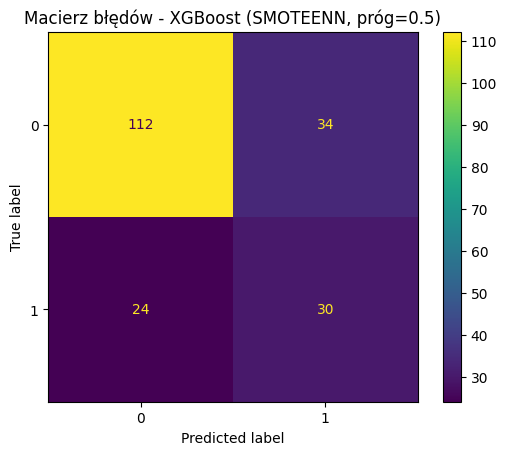

In [70]:


# --- Skalowanie ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- SMOTEENN ---
smoteenn = SMOTEENN(random_state=1)
X_resampled, y_resampled = smoteenn.fit_resample(X_train_scaled, y_train)

# --- Model XGBoost ---
xgb_model = XGBClassifier(
    n_estimators=100,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
    random_state=1
)
xgb_model.fit(X_resampled, y_resampled)

# --- Predykcja z niższym progiem (np. 0.5) ---
y_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]
y_pred = np.where(y_proba > 0.5, 1, 0)

# --- Ewaluacja ---
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# --- Wyniki ---
print(f"Accuracy:  {acc:.2%}")
print(f"Precision: {prec:.2%}")
print(f"Recall:    {rec:.2%}")
print(f"F1-score:  {f1:.2%}")

# --- Macierz błędów ---
disp = ConfusionMatrixDisplay(cm, display_labels=[0, 1])
disp.plot(cmap='viridis')
plt.title("Macierz błędów - XGBoost (SMOTEENN, próg=0.5)")
plt.show()


In [71]:

proporcje = dane['default'].value_counts(normalize=True)
print(proporcje)


default
0    0.7
1    0.3
Name: proportion, dtype: float64


Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:15:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'scale_pos_weight': np.float64(2.252032520325203), 'subsample': 1}
Best ROC AUC: 0.9749150650936365
Best threshold based on F1: 0.557
Accuracy:  71.00%
Precision: 47.14%
Recall:    61.11%
F1-score:  53.23%


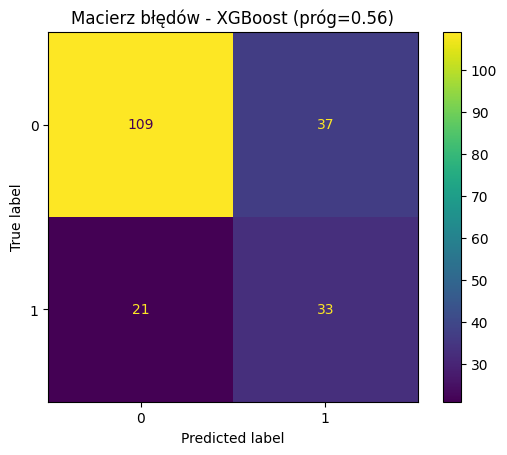

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score

# Parametry do siatki
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'scale_pos_weight': [(y_train == 0).sum() / (y_train == 1).sum()]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=21)

cv = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(xgb, param_grid, scoring='roc_auc', cv=cv, n_jobs=-1, verbose=1)
grid_search.fit(X_resampled, y_resampled)

print("Best params:", grid_search.best_params_)
print("Best ROC AUC:", grid_search.best_score_)

# Używamy najlepszego modelu
best_model = grid_search.best_estimator_

# Predykcja na test
y_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# Optymalizacja progu na podstawie ROC
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"Best threshold based on F1: {best_threshold:.3f}")

y_pred = (y_proba > best_threshold).astype(int)

# Ewaluacja
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.2%}")
print(f"Precision: {precision_score(y_test, y_pred):.2%}")
print(f"Recall:    {recall_score(y_test, y_pred):.2%}")
print(f"F1-score:  {f1_score(y_test, y_pred):.2%}")

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=[0, 1]).plot(cmap='viridis')
plt.title(f"Macierz błędów - XGBoost (próg={best_threshold:.2f})")
plt.show()


=== SVM ===
Accuracy:  67.00%
Precision: 42.31%
Recall:    61.11%
F1-score:  50.00%


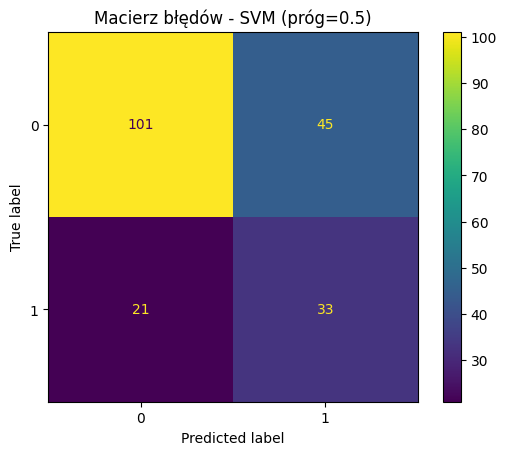

=== k-NN ===
Accuracy:  63.50%
Precision: 37.97%
Recall:    55.56%
F1-score:  45.11%


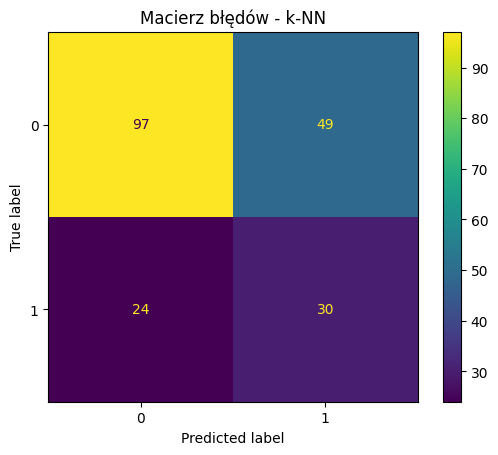

In [ ]:
# Importy
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt

# --- Wczytanie danych ---
dane = pd.read_excel("credit_koniec_v2.xlsx", sheet_name="liczbowe norm", engine="openpyxl")
dane['default'] = dane['default'].astype(int)  # Konwersja do int

# --- Wybór cech ---
features = ['amount', 'savings_balance', 'age', 'months_loan_duration', 'employment_duration', 'credit_history']
X = dane[features]
y = dane['default']

# --- Podział danych ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# --- Skalowanie ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Balansowanie klas SMOTEENN ---
smoteenn = SMOTEENN(random_state=21)
X_resampled, y_resampled = smoteenn.fit_resample(X_train_scaled, y_train)

# --- Model SVM ---
svm_model = SVC(probability=True, random_state=21)
svm_model.fit(X_resampled, y_resampled)

# Predykcja i ewaluacja SVM
y_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]
# Możesz dobrać próg 0.5 lub inny, np. 0.4
threshold_svm = 0.5
y_pred_svm = (y_proba_svm > threshold_svm).astype(int)

print("=== SVM ===")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_svm):.2%}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.2%}")
print(f"Recall:    {recall_score(y_test, y_pred_svm):.2%}")
print(f"F1-score:  {f1_score(y_test, y_pred_svm):.2%}")

cm_svm = confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay(cm_svm, display_labels=[0, 1]).plot(cmap='viridis')
plt.title(f"Macierz błędów - SVM (próg={threshold_svm})")
plt.show()


# --- Model k-NN ---
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_resampled, y_resampled)

# Predykcja i ewaluacja k-NN
y_pred_knn = knn_model.predict(X_test_scaled)

print("=== k-NN ===")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_knn):.2%}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.2%}")
print(f"Recall:    {recall_score(y_test, y_pred_knn):.2%}")
print(f"F1-score:  {f1_score(y_test, y_pred_knn):.2%}")

cm_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(cm_knn, display_labels=[0, 1]).plot(cmap='viridis')
plt.title("Macierz błędów - k-NN")
plt.show()
